## Sai Srihitha Goverdhana U5895603

> 2. Create a notebook. Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original. 

> 3. Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).

> 4. Demonstrate your new encoding by showing the autencoder recreate a random set of digits and your new character.

## Import required libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow import keras

## Load, Normalize the data

In [2]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


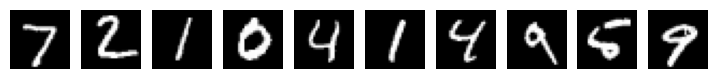

In [3]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load -  Pretrained Model

In [4]:
pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

## Load new images with letter 'S'

## Test

> We can load image in different ways, I have choosen the 2nd method taking images in an array, for easy further process

In [5]:
# load 5 sample images


# loading image
# S1 = tf.keras.utils.load_img("C:/Users/srihi/DSP/Week 12/img1.png", target_size=(28, 28), color_mode = "grayscale")

# S2 = tf.keras.utils.load_img("C:/Users/srihi/DSP/Week 12/img2.png", target_size=(28, 28), color_mode = "grayscale")

# S3 = tf.keras.utils.load_img("C:/Users/srihi/DSP/Week 12/img3.png", target_size=(28, 28), color_mode = "grayscale")

# S4 = tf.keras.utils.load_img("C:/Users/srihi/DSP/Week 12/img4.png", target_size=(28, 28), color_mode = "grayscale")

# S5 = tf.keras.utils.load_img("C:/Users/srihi/DSP/Week 12/img5.png", target_size=(28, 28), color_mode = "grayscale")

pictures = []
for i in range(5):
    img = tf.keras.utils.load_img(f'img{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    pictures.append(img)

## Predict

In [6]:

input_pics = []
for img in pictures:
    input_pic = tf.keras.utils.img_to_array(img)
    input_pic = input_pic/255  # normalize between 0 and 1
    input_pic = input_pic.reshape(784)
    input_pics.append(input_pic)

input_pics = np.array(input_pics)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_pics)
print(predictions.shape)


1/1 [==============================] - 0s 191ms/step
(5, 784)




## Display images with 'S' and Reconstructed images 

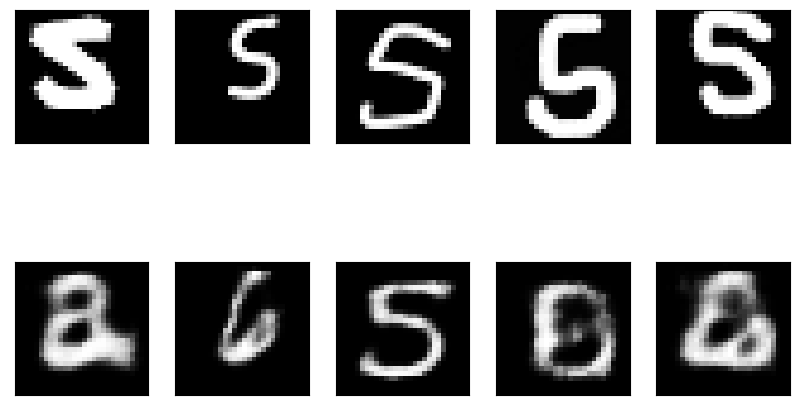

In [7]:

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pictures[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

As we can, this autoencoder doesn't do a good job with this new symbols.

## Create oversampled images + Merge with Training data


In [8]:
input_pics = np.array(input_pics)
bad_images = np.repeat(input_pics, 15, axis=0)#oversampling the data
newset_images = np.vstack((train_images[:500], bad_images))#ony 500 subset from the main dataset
np.random.shuffle(newset_images)

In [9]:
new_images_train = newset_images[int(len(newset_images)*.8):]
new_images_test = newset_images[int(len(newset_images)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [10]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

In [11]:

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)



Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.1485 - val_loss: 0.1511
Epoch 2/15
1/1 [==============================] - 0s 79ms/step - loss: 0.1331 - val_loss: 0.1390
Epoch 3/15
1/1 [==============================] - 0s 76ms/step - loss: 0.1240 - val_loss: 0.1316
Epoch 4/15
1/1 [==============================] - 0s 72ms/step - loss: 0.1181 - val_loss: 0.1295
Epoch 5/15
1/1 [==============================] - 0s 84ms/step - loss: 0.1162 - val_loss: 0.1291
Epoch 6/15
1/1 [==============================] - 0s 83ms/step - loss: 0.1152 - val_loss: 0.1272
Epoch 7/15
1/1 [==============================] - 0s 80ms/step - loss: 0.1123 - val_loss: 0.1264
Epoch 8/15
1/1 [==============================] - 0s 79ms/step - loss: 0.1106 - val_loss: 0.1247
Epoch 9/15
1/1 [==============================] - 0s 81ms/step - loss: 0.1077 - val_loss: 0.1235
Epoch 10/15
1/1 [==============================] - 0s 75ms/step - loss: 0.1053 - val_loss: 0.1224
Epoch 11/15
1/1 [==============

## Test 1

> Testing the model on the original Test Set

313/313 [==============================] - 1s 4ms/step


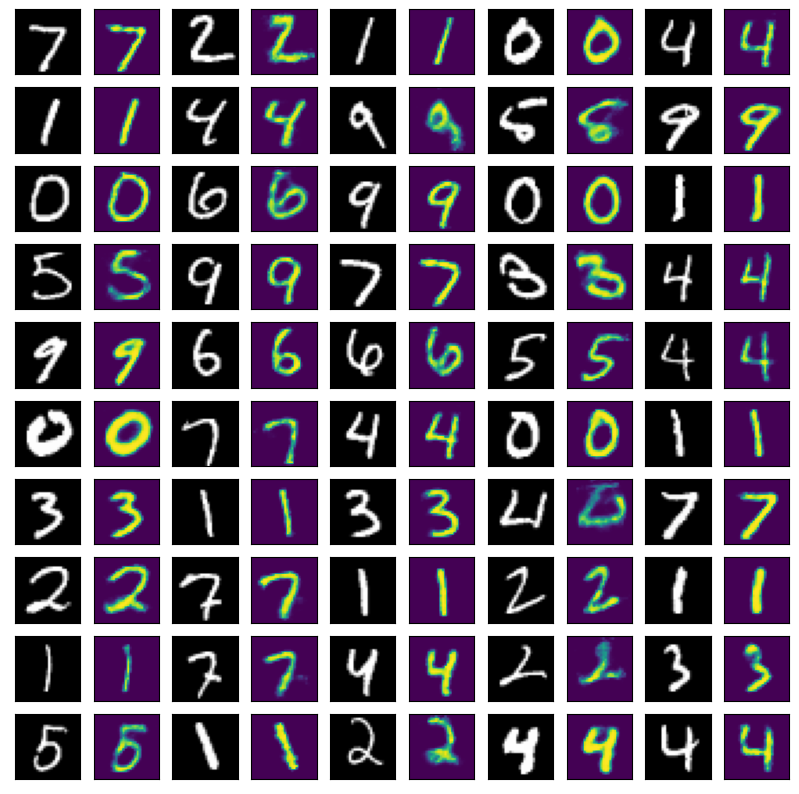

In [12]:
reconstructed_images = updated_model.predict(test_images)

pictures = []
for i in range(100):
    pictures.append(test_images[i].reshape(28,28))
    pictures.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(pictures[i],cmap='gray')
    else:
        plt.imshow(pictures[i])
plt.show()


## Test 2

> Validating the Model with New Test Set

In [13]:
# load 5 sample images
pictures = []
for i in range(5):
    img_path = f'img{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    pictures.append(img)
    
# predict the images from this sample
input_pics = []
for img in pictures:
    input_pic = tf.keras.utils.img_to_array(img)
    input_pic = input_pic/ 255 # normalize between 0 and 1
    input_pic = input_pic.reshape(784)
    input_pics.append(input_pic)

input_pics = np.array(input_pics)
predictions = updated_model.predict(input_pics)
print(predictions.shape)

1/1 [==============================] - 0s 30ms/step
(5, 784)


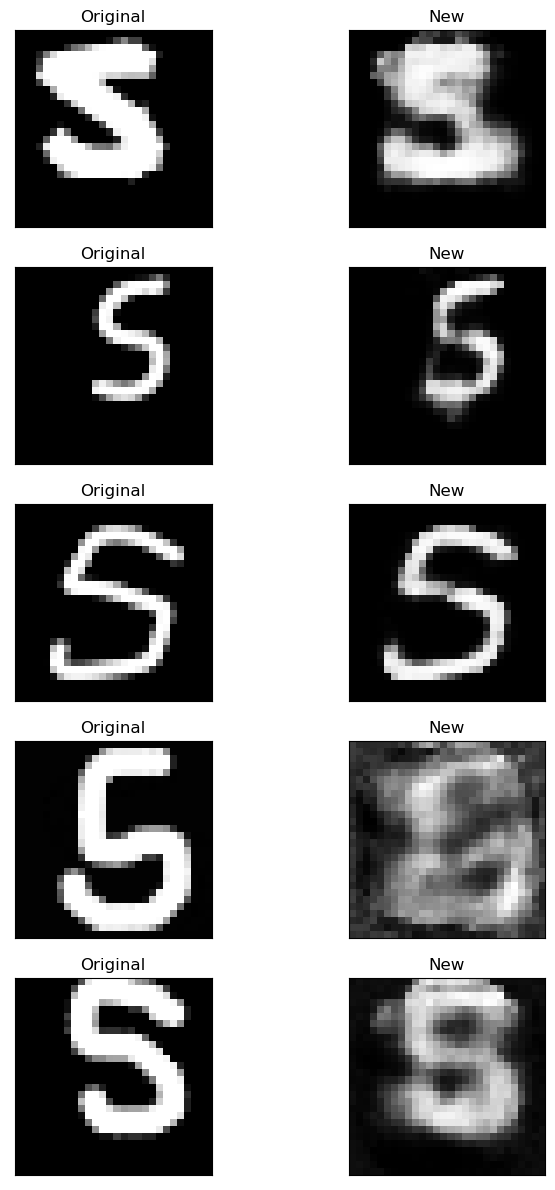

In [14]:
# display the images and their reconstructions side by side
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(pictures[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("New")

plt.tight_layout()
plt.show()

## Save the autoencoder.

> A saved version of my trained autoencoder 

In [15]:
updated_model.save('WE11_Srihitha_autoencoder.h5')

### Analysis:

> Here, first, we loaded MNIST Dataset and images with the letter 'S' has been loaded. 

> The above graph shows the difference between Original and New(Reconstructed) images. One graph is with the original existing model, and the latest one is training the already existing model by adding oversampled images to MNIST Dataset.

> Coming to oversampling, we can increase the new model's performance by increasing the oversampling count. But there is a drawback upon increasing the sampling count, and the model might lose the ability to predict the digits in MNIST data accurately.